In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
pd.set_option('display.max_columns', None)

In [10]:

df = pd.read_csv("data.csv")
df.sample(20)

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
319,disco.00037.au,129.199219,64,0.454598,0.163963,3637.592790,3198.874413,7771.178009,0.190096,-26.542304,52.045564,4.177803,12.859275,16.739202,10.132084,4.474744,6.326224,1.156083,0.643618,4.610238,2.143100,-3.366190,1.630555,-1.879815,-1.086937,-0.671434,2.384351,4.168808,2.866404,disco
988,rock.00001.au,151.999081,66,0.365525,0.180543,1529.345464,1845.423388,3271.663550,0.054982,-111.136301,134.159482,-24.647956,41.544623,-3.057124,28.483072,-10.571676,14.921677,-14.384826,8.840186,-4.542453,9.939369,-4.665001,3.626334,-5.541119,3.364801,-4.942521,-1.472867,0.100885,-5.332559,rock
543,jazz.00002.au,151.999081,74,0.267640,0.080840,1064.810564,1050.419172,1896.030202,0.057873,-256.988341,175.320329,-44.813535,25.668162,-4.256994,-0.217434,-11.323568,-9.182985,-4.099383,-8.296617,-22.550930,-7.605030,-7.650579,-11.742024,-8.173052,-7.497922,-12.295748,-6.769272,-3.495534,-8.644751,jazz
35,blues.00013.au,107.666016,52,0.264616,0.113221,1324.304356,1827.737535,2710.033613,0.051417,-209.789266,124.458449,10.310380,47.018006,6.510238,15.405449,-1.992710,6.717405,-21.554193,10.721716,-5.524965,-2.205935,-3.038192,8.645516,-0.304230,-0.637744,-2.939885,-1.705923,-1.769590,-7.762958,blues
618,metal.00023.au,143.554688,64,0.527230,0.195360,2576.041810,2236.932632,5058.086081,0.131788,-43.701356,82.758904,-29.652884,70.435044,-21.627346,31.176199,2.065072,28.898081,-2.691430,19.916211,-6.947373,19.148092,-7.378656,7.899673,-13.871894,4.065650,-6.877739,-1.789167,1.461094,4.540864,metal
754,pop.00086.au,129.199219,65,0.387726,0.132529,3594.152474,3170.854350,7634.403836,0.185232,-50.421443,56.413722,12.562735,11.289535,-2.737636,1.364933,4.539499,-0.963283,2.289538,2.739169,-1.986760,2.597377,-4.018105,0.685571,-1.394876,3.323456,3.023512,2.627073,2.075448,1.360680,pop
149,classical.00067.au,143.554688,22,0.267353,0.031688,1118.227507,1702.174920,1993.671278,0.046355,-413.575993,143.425235,31.343837,14.031339,1.524376,-2.291032,-6.478890,-8.102931,-5.924819,-4.462899,-2.783361,-0.809473,-1.208140,-2.380846,-3.810327,-3.515402,-2.712517,-2.385786,0.622824,2.667577,classical
694,metal.00034.au,161.499023,77,0.406925,0.090518,2707.499443,2235.037778,5291.984667,0.160912,-104.659769,87.734399,-33.244182,48.458421,-28.922477,22.518297,-24.992391,20.535509,-12.079379,18.255103,-15.190935,10.296387,-13.895425,10.289224,-4.698807,9.939768,-5.625999,4.788623,-11.680061,2.959149,metal
211,country.00066.au,112.347147,52,0.320705,0.136488,1701.104158,1709.061690,3242.238728,0.098868,-102.483147,135.722384,-46.893422,32.745640,-11.155920,23.464548,-9.766566,16.899491,-11.682231,13.207577,-7.181133,4.735461,-8.199781,2.609435,-2.986783,6.804161,-2.077942,3.291827,0.285595,-4.219650,country
528,jazz.00064.au,99.384014,48,0.379741,0.212099,1575.236470,2069.619316,3340.363135,0.055880,-69.500033,125.986823,-5.176155,30.776082,8.306017,5.087670,-3.919452,5.380095,-10.781563,9.034922,-8.269533,4.791892,-5.127416,2.211741,-4.781665,0.622460,0.029859,1.230917,4.030604,5.088752,jazz


In [2]:
df.label.unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [3]:
df.columns

Index(['filename', 'tempo', 'beats', 'chroma_stft', 'rmse',
       'spectral_centroid', 'spectral_bandwidth', 'rolloff',
       'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5',
       'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12',
       'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19',
       'mfcc20', 'label'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            1000 non-null   object 
 1   tempo               1000 non-null   float64
 2   beats               1000 non-null   int64  
 3   chroma_stft         1000 non-null   float64
 4   rmse                1000 non-null   float64
 5   spectral_centroid   1000 non-null   float64
 6   spectral_bandwidth  1000 non-null   float64
 7   rolloff             1000 non-null   float64
 8   zero_crossing_rate  1000 non-null   float64
 9   mfcc1               1000 non-null   float64
 10  mfcc2               1000 non-null   float64
 11  mfcc3               1000 non-null   float64
 12  mfcc4               1000 non-null   float64
 13  mfcc5               1000 non-null   float64
 14  mfcc6               1000 non-null   float64
 15  mfcc7               1000 non-null   float64
 16  mfcc8  

In [5]:
num = df.select_dtypes(include="number")
cat = df.select_dtypes(exclude="number")

## Propuestas de análisis:
1. Estadística univariable:
Analice las distribuciones de cada característica para entender cómo varían según el género. Algunos ejemplos:

Tempo: ¿Qué géneros tienen tempos más rápidos o más lentos?

Centroide espectral: ¿Qué géneros tienden a concentrar su energía en frecuencias más altas o bajas?

Explora estadísticas como la media, mediana, moda y la desviación estándar de las características numéricas.


In [7]:
df = df.set_index("filename")

In [8]:
df

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
filename,,,,,,,,,,,,,,,,,,,,,
blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,107.334008,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,136.170239,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,110.843070,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,132.799175,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,102.829023,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rock.00017.au,123.046875,59,0.418812,0.166056,2312.030070,2060.825761,4528.197619,0.140588,-41.402023,105.403012,...,11.303100,-14.155566,2.824157,-9.477822,3.331261,-8.200088,3.693091,-3.673562,-0.163201,rock
rock.00081.au,117.453835,56,0.335774,0.093676,2553.856706,2219.090892,5123.752351,0.136173,-121.410791,89.522283,...,9.149520,-10.112054,4.211237,-9.349345,1.609701,-10.553566,1.066489,-1.654875,7.544224,rock
rock.00004.au,103.359375,45,0.372834,0.208743,1345.850763,1841.748033,2939.265560,0.041099,-127.946876,134.443879,...,11.043714,-8.385375,2.111019,-6.338260,0.997383,-5.325869,-0.842192,-4.665996,-4.787677,rock


In [9]:
df.shape

(1000, 29)

In [10]:
df.describe()

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,119.601702,57.138000,0.378656,0.130929,2201.834226,2242.559613,4571.702159,0.103637,-144.479173,99.552199,...,-6.021121,4.471604,-4.797232,1.781547,-3.870275,1.147988,-3.967431,0.507303,-2.328779,-1.094875
std,28.297367,14.225728,0.081689,0.065685,715.961347,526.337663,1574.770035,0.041834,100.235661,31.331904,...,6.819018,6.717312,6.170919,5.009489,4.874423,4.579110,4.550650,3.869088,3.755574,3.837561
min,54.978391,18.000000,0.171782,0.005276,569.930721,897.994319,749.062137,0.021701,-552.064063,-1.527148,...,-28.052265,-15.805227,-27.542309,-12.598773,-17.545474,-15.693589,-17.227765,-11.975698,-18.504188,-19.935203
25%,99.384014,47.000000,0.319641,0.086625,1627.793931,1907.136505,3380.956639,0.070281,-200.695133,76.811480,...,-10.966826,-0.551576,-9.363372,-1.640080,-7.164838,-1.857098,-7.194297,-2.003979,-4.670281,-3.368000
50%,117.453835,56.000000,0.383075,0.122448,2209.468780,2221.408983,4658.671830,0.099539,-120.206072,98.452551,...,-5.920161,3.891842,-4.199810,1.879424,-3.614473,1.211944,-4.059109,0.669788,-2.391261,-1.155198
75%,135.999178,65.250000,0.435974,0.175793,2691.969702,2578.474352,5534.197785,0.132007,-73.895019,119.893638,...,-1.004241,9.706133,-0.161017,5.155264,-0.323536,4.350694,-0.842968,3.112518,0.149070,1.303739
max,234.907670,117.000000,0.663573,0.398012,4434.439444,3509.578677,8676.405868,0.274829,42.034587,193.096518,...,17.421038,23.037571,13.054333,18.161663,12.357588,13.468803,11.489994,15.379257,14.686910,15.368966


In [11]:
df.isna().sum

<bound method DataFrame.sum of                 tempo  beats  chroma_stft   rmse  spectral_centroid  \
filename                                                              
blues.00081.au  False  False        False  False              False   
blues.00022.au  False  False        False  False              False   
blues.00031.au  False  False        False  False              False   
blues.00012.au  False  False        False  False              False   
blues.00056.au  False  False        False  False              False   
...               ...    ...          ...    ...                ...   
rock.00017.au   False  False        False  False              False   
rock.00081.au   False  False        False  False              False   
rock.00004.au   False  False        False  False              False   
rock.00006.au   False  False        False  False              False   
rock.00066.au   False  False        False  False              False   

                spectral_bandwidth  rolloff  

In [12]:
num.nunique()

tempo                  35
beats                  81
chroma_stft           986
rmse                  986
spectral_centroid     986
spectral_bandwidth    986
rolloff               986
zero_crossing_rate    985
mfcc1                 986
mfcc2                 986
mfcc3                 986
mfcc4                 986
mfcc5                 986
mfcc6                 986
mfcc7                 986
mfcc8                 986
mfcc9                 986
mfcc10                986
mfcc11                986
mfcc12                986
mfcc13                986
mfcc14                986
mfcc15                986
mfcc16                986
mfcc17                986
mfcc18                986
mfcc19                986
mfcc20                986
dtype: int64

In [13]:
num.beats.value_counts()

beats
47    38
55    33
54    31
56    31
45    31
      ..
95     1
22     1
29     1
18     1
98     1
Name: count, Length: 81, dtype: int64

In [14]:
num.tempo.value_counts()

tempo
123.046875    94
117.453835    79
129.199219    79
107.666016    66
99.384014     66
151.999081    62
112.347147    62
135.999178    61
103.359375    56
95.703125     54
143.554688    48
161.499023    45
92.285156     37
89.102909     29
172.265625    26
184.570312    23
83.354335     19
86.132812     14
80.749512     12
73.828125     10
78.302557      9
75.999540      8
198.768029     7
71.777344      6
215.332031     5
69.837416      4
67.999589      3
64.599609      3
66.256010      3
61.523438      3
63.024009      2
58.726918      2
234.907670     1
60.092660      1
54.978391      1
Name: count, dtype: int64

In [15]:
num.describe().T.round(0)

,count,mean,std,min,25%,50%,75%,max
tempo,1000.0,120.0,28.0,55.0,99.0,117.0,136.0,235.0
beats,1000.0,57.0,14.0,18.0,47.0,56.0,65.0,117.0
chroma_stft,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
rmse,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
spectral_centroid,1000.0,2202.0,716.0,570.0,1628.0,2209.0,2692.0,4434.0
spectral_bandwidth,1000.0,2243.0,526.0,898.0,1907.0,2221.0,2578.0,3510.0
rolloff,1000.0,4572.0,1575.0,749.0,3381.0,4659.0,5534.0,8676.0
zero_crossing_rate,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mfcc1,1000.0,-144.0,100.0,-552.0,-201.0,-120.0,-74.0,42.0
mfcc2,1000.0,100.0,31.0,-2.0,77.0,98.0,120.0,193.0


In [16]:
df["beats"].var()

202.3713273273273

In [17]:
pip install Matplotlib

Note: you may need to restart the kernel to use updated packages.


## 1. Análisis de la distribución del tempo por género

/var/folders/cz/35gfl8ts1n39c5cfv2rn7pxw0000gn/T/ipykernel_5534/1316853724.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="label", y="tempo", palette="muted")


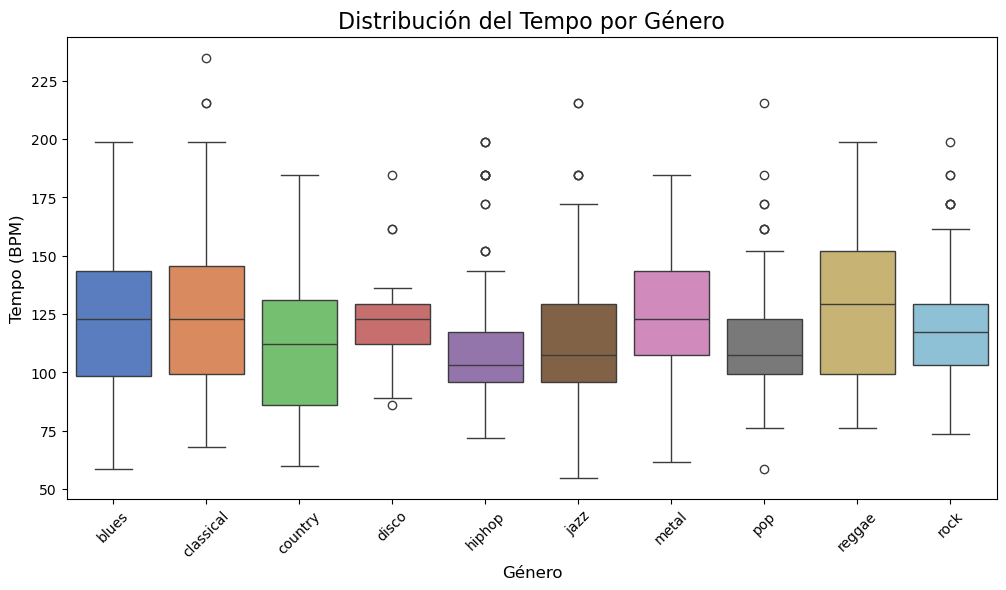

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="label", y="tempo", palette="muted")
plt.title("Distribución del Tempo por Género", fontsize=16)
plt.xlabel("Género", fontsize=12)
plt.ylabel("Tempo (BPM)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

¿Qué muestra este gráfico?:
Observa la mediana (línea dentro de las cajas) del tempo para cada género.
Evalúa si algún género tiene una distribución de tempo más amplia (cajas grandes) o más estrecha (cajas pequeñas).

## 2. Análisis del centroide espectral por género
   
El centroide espectral puede reflejar si un género musical tiene más energía en frecuencias altas o bajas. Esto lo podemos analizar con gráficos de densidad (KDE).

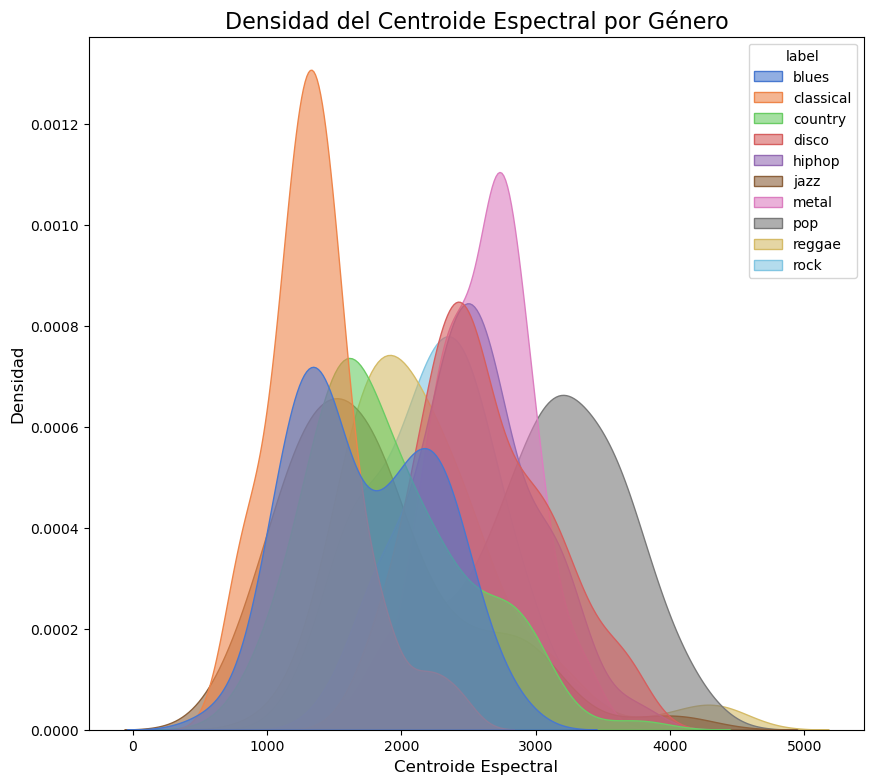

In [44]:
plt.figure(figsize=(10, 9))
sns.kdeplot(data=df, x="spectral_centroid", hue="label", fill=True, common_norm=False, palette="muted", alpha=0.6)
plt.title("Densidad del Centroide Espectral por Género", fontsize=16)
plt.xlabel("Centroide Espectral", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.show()

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

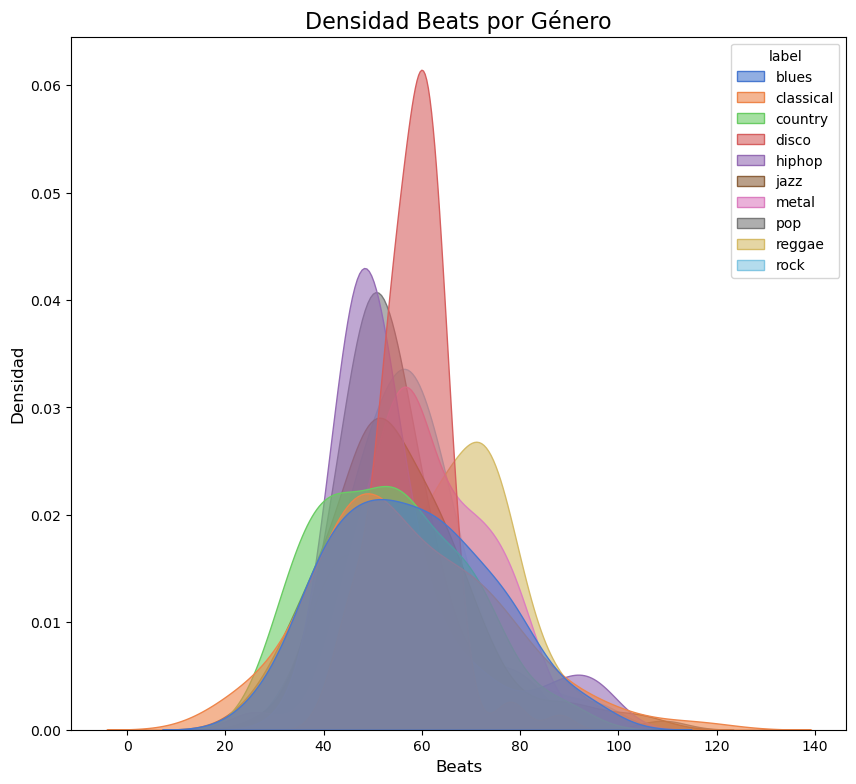

In [88]:
plt.figure(figsize=(10, 9))
sns.kdeplot(data=df, x="beats", hue="label", fill=True, common_norm=False, palette="muted", alpha=0.6)
plt.title("Densidad Beats por Género", fontsize=16)
plt.xlabel("Beats", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.show()

¿Qué muestra este gráfico?:
Las curvas muestran cómo se distribuyen los valores de spectral_centroidcada género.
Busca picos en frecuencias bajas (energía grave) o altas (energía aguda) dependiendo del género.

3. Estadísticas descriptivas por género
   
Calcula las estadísticas clave (media, mediana, desviación estándar) del tempo y spectral_centroid para cada género.

In [51]:
estadisticas = df.groupby("label")[["tempo", "spectral_centroid"]].agg(["mean", "median", "std"])
print(estadisticas)

                tempo                        spectral_centroid               \
                 mean      median        std              mean       median   
label                                                                         
blues      120.742207  123.046875  31.791720       1727.655327  1631.304748   
classical  127.032280  123.046875  33.360682       1353.991363  1344.843285   
country    110.858840  112.347147  29.639760       1896.095815  1766.825603   
disco      120.341798  123.046875  14.224123       2619.973550  2545.955736   
hiphop     113.976295  103.359375  28.968860       2524.614443  2500.875497   
jazz       115.068143  107.666016  30.645780       1792.404455  1692.586145   
metal      125.610877  123.046875  24.820210       2602.175432  2683.416292   
pop        112.759957  107.666016  24.635714       3073.663995  3142.541774   
reggae     129.364182  129.199219  29.483938       2185.110737  2070.103744   
rock       120.262441  117.453835  25.239888       2

Interpretación:
Observa las diferencias en la media y mediana del tempo y el centroide espectral entre géneros.
Analiza si la desviación estándar ( std) indica más variabilidad dentro de un género en particular.

4. Comparativa gráfica de medios
Representa las medias de tempo y spectral_centroid para cada género en un gráfico de barras.

/var/folders/cz/35gfl8ts1n39c5cfv2rn7pxw0000gn/T/ipykernel_5534/2904376993.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=media_df, x="label", y="tempo", palette="muted")


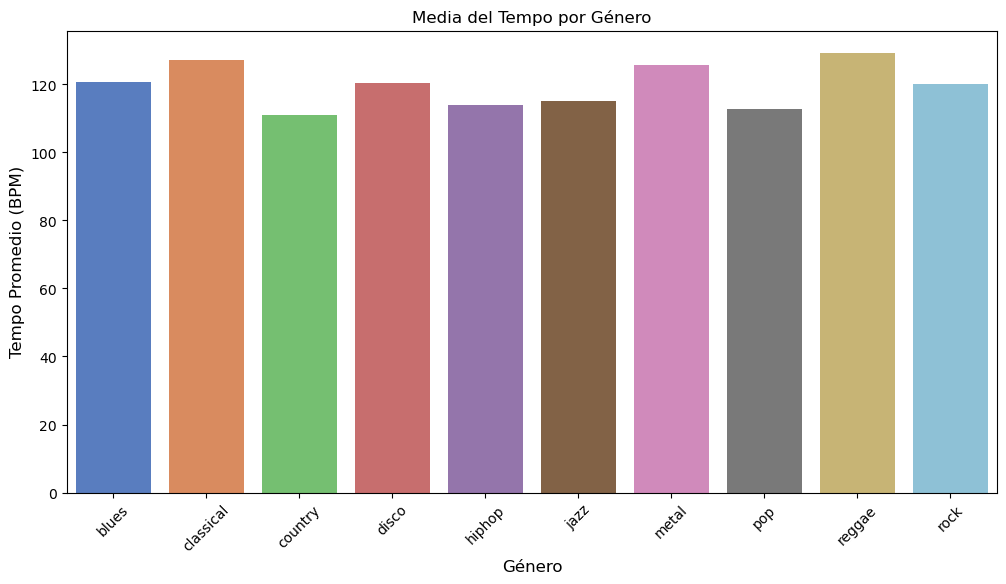

/var/folders/cz/35gfl8ts1n39c5cfv2rn7pxw0000gn/T/ipykernel_5534/2904376993.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=media_df, x="label", y="spectral_centroid", palette="muted")


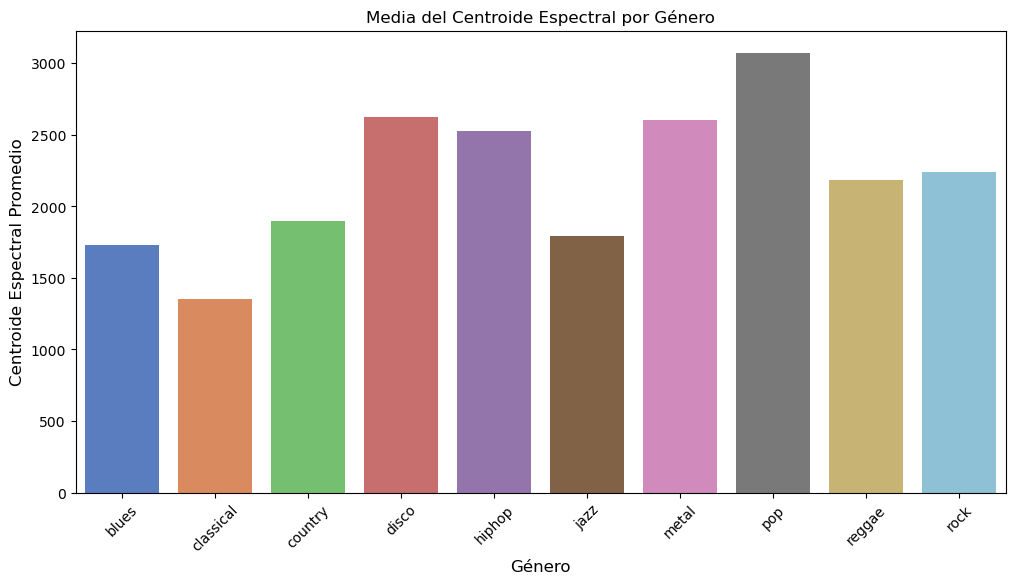

In [99]:
media_df = df.groupby("label")[["tempo", "spectral_centroid"]].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=media_df, x="label", y="tempo", palette="muted")
plt.title("Media del Tempo por Género", fontsize=12)
plt.xlabel("Género", fontsize=12)
plt.ylabel("Tempo Promedio (BPM)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=media_df, x="label", y="spectral_centroid", palette="muted")
plt.title("Media del Centroide Espectral por Género", fontsize=12)
plt.xlabel("Género", fontsize=12)
plt.ylabel("Centroide Espectral Promedio", fontsize=12)
plt.xticks(rotation=45)
plt.show()

¿Qué muestra este gráfico?:
La comparación visual de los medios ayuda a identificar géneros con tempos rápidos o más energía en frecuencias altas.

## 2. Comparaciones bivariables (correlaciones y gráficas):
Correlaciones:
¿Cómo se relacionan características como tempo y beats?
Relación entre spectral_centroid y spectral_bandwidth.
Visualizaciones:
Boxplots para comparar tempo entre géneros.
Diagramas de dispersión para observar tendencias entre mfcc1 y rmse.


### Relacción entre Tempo y Beats

In [68]:
df['tempo'].corr(df['beats']) # PEARSON

0.9661792458636242

In [70]:
df['tempo'].corr(df['beats'], method='spearman')

0.964985844708903

In [74]:
spearman_correlations_sorted = num.corrwith(df['chroma_stft'], method='pearson').sort_values(ascending=False) # positive ones
spearman_correlations_sorted

chroma_stft           1.000000
mfcc1                 0.659294
spectral_centroid     0.615524
rolloff               0.597910
zero_crossing_rate    0.554735
spectral_bandwidth    0.517482
mfcc12                0.516620
mfcc8                 0.509829
rmse                  0.499577
mfcc10                0.489380
mfcc14                0.417161
mfcc6                 0.416953
mfcc16                0.332396
mfcc20                0.281775
mfcc18                0.269791
mfcc4                 0.264226
mfcc9                 0.115721
beats                 0.080684
mfcc11                0.072668
mfcc7                 0.067536
tempo                 0.030640
mfcc5                -0.010116
mfcc3                -0.054431
mfcc13               -0.081725
mfcc19               -0.089906
mfcc15               -0.143455
mfcc17               -0.163450
mfcc2                -0.598495
dtype: float64

In [83]:
df['spectral_centroid'].corr(df['spectral_bandwidth']) # PEARSON

0.9044381706706397

In [85]:
df['spectral_centroid'].corr(df['spectral_bandwidth'], method='spearman')

0.8982054256546812

In [110]:
"""
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="label", y="tempo", palette="muted")
plt.title("Tempo por Género", fontsize=12)
plt.xlabel("Género", fontsize=12)
plt.ylabel("Tempo (BPM)", fontsize=18)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="label", y="spectral_centroid", palette="muted")
plt.title("Media del Centroide Espectral por Género", fontsize=12)
plt.xlabel("Género", fontsize=12)
plt.ylabel("Centroide Espectral", fontsize=12)
plt.xticks(rotation=45)
plt.show() """

'\nplt.figure(figsize=(12, 6))\nsns.barplot(data=df, x="label", y="tempo", palette="muted")\nplt.title("Tempo por Género", fontsize=12)\nplt.xlabel("Género", fontsize=12)\nplt.ylabel("Tempo (BPM)", fontsize=18)\nplt.xticks(rotation=45)\nplt.show()\n\nplt.figure(figsize=(12, 6))\nsns.barplot(data=df, x="label", y="spectral_centroid", palette="muted")\nplt.title("Media del Centroide Espectral por Género", fontsize=12)\nplt.xlabel("Género", fontsize=12)\nplt.ylabel("Centroide Espectral", fontsize=12)\nplt.xticks(rotation=45)\nplt.show() '

Correlación entre tempo y beats: 0.97


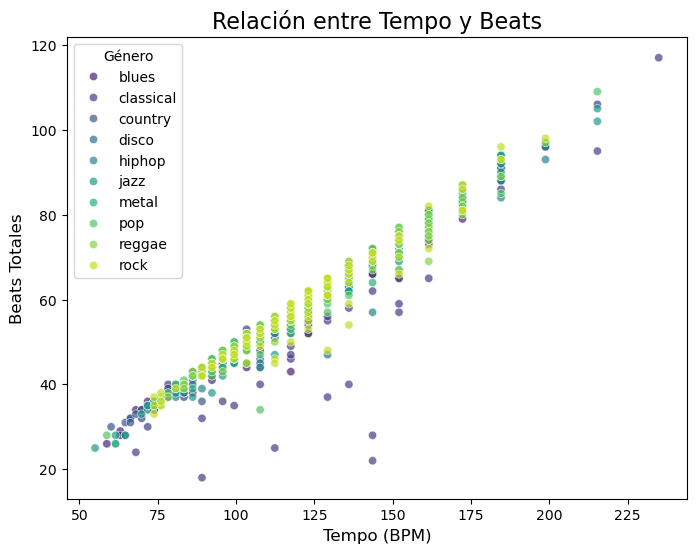

In [112]:
# Calcular correlación entre tempo y beats
correlacion_tempo_beats = df["tempo"].corr(df["beats"])
print(f"Correlación entre tempo y beats: {correlacion_tempo_beats:.2f}")

# Diagrama de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="tempo", y="beats", hue="label", palette="viridis", alpha=0.7)
plt.title("Relación entre Tempo y Beats", fontsize=16)
plt.xlabel("Tempo (BPM)", fontsize=12)
plt.ylabel("Beats Totales", fontsize=12)
plt.legend(title="Género")
plt.show()


# POCA RELACCION

Correlación entre rmse y zero_crossing_rate: 0.33


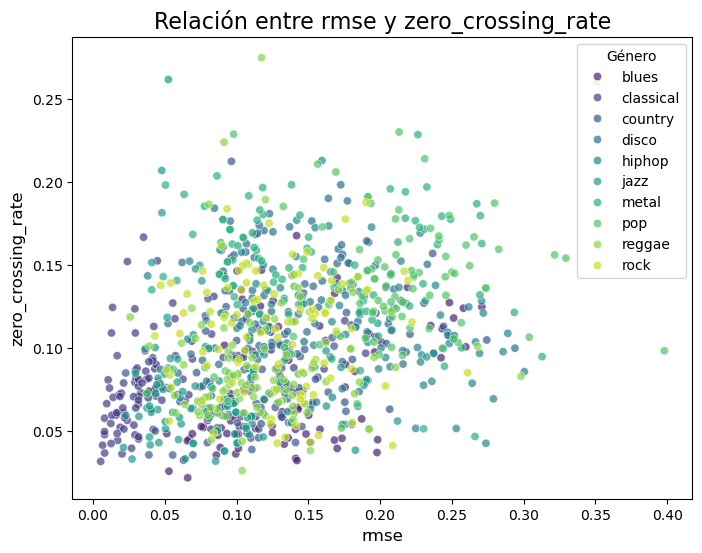

In [15]:
# Calcular correlación entre rmse y zero_croassing_rate
correlacion_rmse_zero_crossing_rate = df["rmse"].corr(df["zero_crossing_rate"])
print(f"Correlación entre rmse y zero_crossing_rate: {correlacion_rmse_zero_crossing_rate:.2f}")

# Diagrama de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="rmse", y="zero_crossing_rate", hue="label", palette="viridis", alpha=0.7)
plt.title("Relación entre rmse y zero_crossing_rate", fontsize=16)
plt.xlabel("rmse", fontsize=12)
plt.ylabel("zero_crossing_rate", fontsize=12)
plt.legend(title="Género")
plt.show()


Correlación entre rmse y rolloff: 0.54


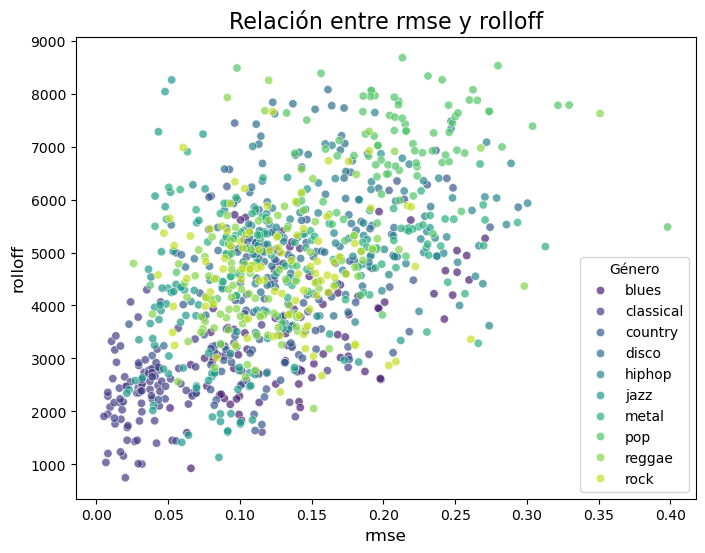

In [29]:
# Calcular correlación entre rmse y rolloff
correlacion_rms_rolloff = df["rmse"].corr(df["rolloff"])
print(f"Correlación entre rmse y rolloff: {correlacion_rmse_rolloff:.2f}")

# Diagrama de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="rmse", y="rolloff", hue="label", palette="viridis", alpha=0.7)
plt.title("Relación entre rmse y rolloff", fontsize=16)
plt.xlabel("rmse", fontsize=12)
plt.ylabel("rolloff", fontsize=12)
plt.legend(title="Género")
plt.show()

1.2 Relación entre spectral_centroidyspectral_bandwidth
De manera similar, calculamos la compensación y visualizamos



1. Correlaciones
1.1 Relación entre tempoybeats
Calculamos la aceleración y visualizamos la relación con un diagrama de dispersión:


Correlación entre spectral_centroid y spectral_bandwidth: 0.90


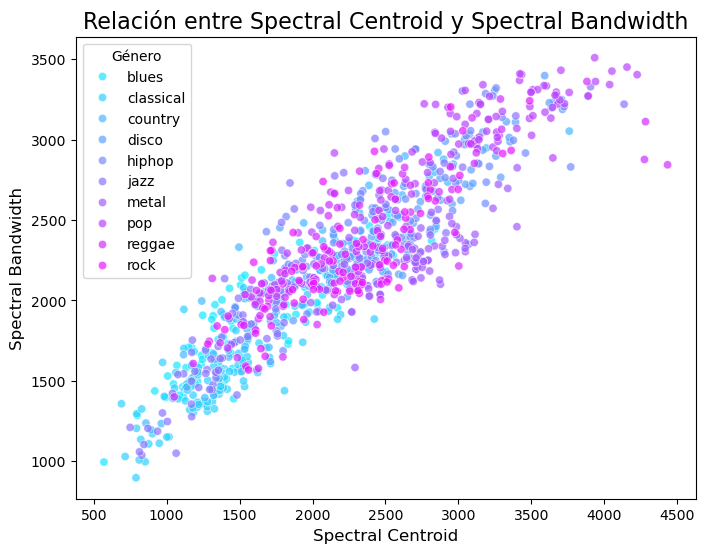

In [126]:
# Calcular correlación entre spectral_centroid y spectral_bandwidth
correlacion_centroid_bandwidth = df["spectral_centroid"].corr(df["spectral_bandwidth"])
print(f"Correlación entre spectral_centroid y spectral_bandwidth: {correlacion_centroid_bandwidth:.2f}")

# Diagrama de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="spectral_centroid", y="spectral_bandwidth", hue="label", palette="cool", alpha=0.7)
plt.title("Relación entre Spectral Centroid y Spectral Bandwidth", fontsize=16)
plt.xlabel("Spectral Centroid", fontsize=12)
plt.ylabel("Spectral Bandwidth", fontsize=12)
plt.legend(title="Género")
plt.show()


/var/folders/cz/35gfl8ts1n39c5cfv2rn7pxw0000gn/T/ipykernel_5534/3396035267.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="label", y="tempo", palette="Set2")


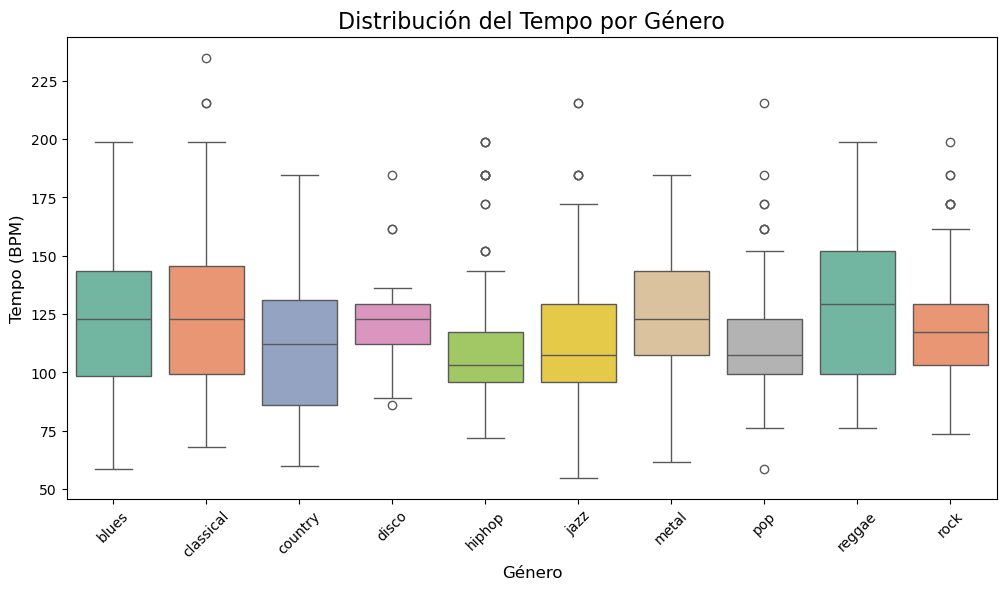

In [128]:
# Boxplot para comparar el tempo entre géneros
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="label", y="tempo", palette="Set2")
plt.title("Distribución del Tempo por Género", fontsize=16)
plt.xlabel("Género", fontsize=12)
plt.ylabel("Tempo (BPM)", fontsize=12)
plt.xticks(rotation=45)
plt.show()


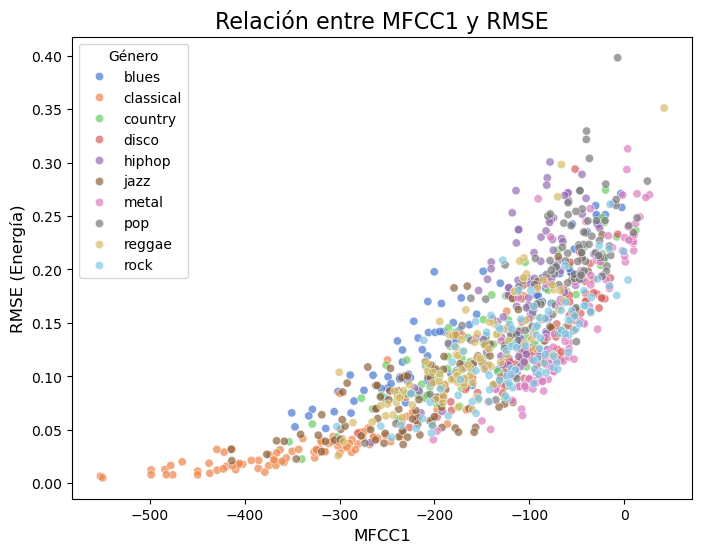

In [130]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="mfcc1", y="rmse", hue="label", palette="muted", alpha=0.7)
plt.title("Relación entre MFCC1 y RMSE", fontsize=16)
plt.xlabel("MFCC1", fontsize=12)
plt.ylabel("RMSE (Energía)", fontsize=12)
plt.legend(title="Género")
plt.show()

3. predicción (aprendizaje automático):
Target: Usa label(género musical) como la variable objetivo.
Modelos:
Usa las columnas numéricas ( tempo, spectral_centroid, mfcc, etc.) como características para entrenar un modelo de clasificación como:
Árboles de decisión.
Bosque aleatorio.
Sistema de Gestión de Valores.
Ideas:
Predecir el género basado en las características de audio.
Agrupa los géneros en categorías similares (por ejemplo, "rápido/lento" o "alta/baja energía") y predice la categoría.


4. Análisis por clusters:
Aplica técnicas como K-means o PCA para agrupar los audios basándote en características como los coeficientes mfcco tempo.
Explora si estos clusters coinciden con los géneros reales.


5. Relación género y tiempo:
Analiza si ciertos géneros tienen un rango de tempo distintivo:
Ejemplo: El rock y el pop tienden a ser de tempo medio, mientras que el metal puede tener tempos más altos.


In [64]:
df.columns

Index(['filename', 'tempo', 'beats', 'chroma_stft', 'rmse',
       'spectral_centroid', 'spectral_bandwidth', 'rolloff',
       'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5',
       'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12',
       'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19',
       'mfcc20', 'label'],
      dtype='object')

In [74]:
y = df["label"]
X = df[['tempo', 'beats', 'chroma_stft', 'rmse',
       'spectral_centroid', 'spectral_bandwidth', 'rolloff',
       'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5',
       'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12',
       'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19',
       'mfcc20']]

In [70]:
y

0      blues
1      blues
2      blues
3      blues
4      blues
       ...  
995     rock
996     rock
997     rock
998     rock
999     rock
Name: label, Length: 1000, dtype: object

In [76]:
X

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,107.334008,-46.809993,40.932634,-21.463776,24.816275,-18.945571,15.253459,-15.050104,12.262823,-15.234050,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987
1,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,136.170239,3.289490,48.931193,8.699106,13.954752,5.359449,0.381334,-13.490265,16.871769,5.145258,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485
2,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,110.843070,18.620984,30.922996,3.291330,22.587447,-20.418303,12.120995,-26.347956,-4.356270,-26.406674,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260
3,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,132.799175,-15.438986,60.986727,0.725807,12.437828,1.183836,-1.540779,-17.888154,8.358496,-2.452068,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607
4,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,102.829023,-12.517677,56.993472,2.271347,26.591402,-4.274803,17.338809,-7.985593,15.235427,-6.934599,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,123.046875,59,0.418812,0.166056,2312.030070,2060.825761,4528.197619,0.140588,-41.402023,105.403012,-43.945538,54.100395,-18.411090,23.520838,-17.607988,20.660727,-18.454381,17.475770,-15.174259,11.303100,-14.155566,2.824157,-9.477822,3.331261,-8.200088,3.693091,-3.673562,-0.163201
996,117.453835,56,0.335774,0.093676,2553.856706,2219.090892,5123.752351,0.136173,-121.410791,89.522283,-33.497073,41.974745,-25.936361,23.026082,-20.271538,14.354429,-16.350707,17.039462,-16.957086,9.149520,-10.112054,4.211237,-9.349345,1.609701,-10.553566,1.066489,-1.654875,7.544224
997,103.359375,45,0.372834,0.208743,1345.850763,1841.748033,2939.265560,0.041099,-127.946876,134.443879,1.027332,54.440979,-0.464906,35.829542,-10.860896,16.383278,-10.030961,6.602061,-6.700004,11.043714,-8.385375,2.111019,-6.338260,0.997383,-5.325869,-0.842192,-4.665996,-4.787677
998,112.347147,45,0.344472,0.180163,1675.475369,1653.422860,3253.563659,0.087294,-98.356322,136.611573,-46.700574,46.457300,-17.135585,10.505286,-14.554871,16.543108,-12.317913,3.689543,-12.647550,2.945863,-12.509212,0.091337,-0.774780,-5.700102,-8.630916,-1.903803,-2.196753,-3.395148
